**IMPORTING CSV FILE FROM KAGGLE DATASETS**


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('F:\core\Machine L_project\predictive_maintenance.csv')

In [65]:
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L         

**DATA CLEANING**

In [66]:
# Check for missing values
print(df.isnull().sum())

# Impute or remove missing values (if any)
data = df.dropna()  # Example: dropping missing values
# Alternatively, use imputation techniques if appropriate


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


**CONVERT STRING INTO NUMERICAL**

In [67]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Failure Type'
data['Failure Type Encoded'] = label_encoder.fit_transform(data['Failure Type'])
data['Type'] = label_encoder.fit_transform(data['Type']) # H=0, M=2 and L=1

# Drop the original 'Failure Type' column
data = data.drop(['Failure Type'], axis=1)


**REMOVING OUTLIERS**

In [68]:
import numpy as np
from scipy import stats

# Detect and remove outliers based on z-scores
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type Encoded', 'Type', 'Target']
z_scores = np.abs(stats.zscore(data[numerical_columns]))
outliers = (z_scores > 3).all(axis=1)

# Remove outliers
data = data[~outliers]


**DATA VISUALIZATION**

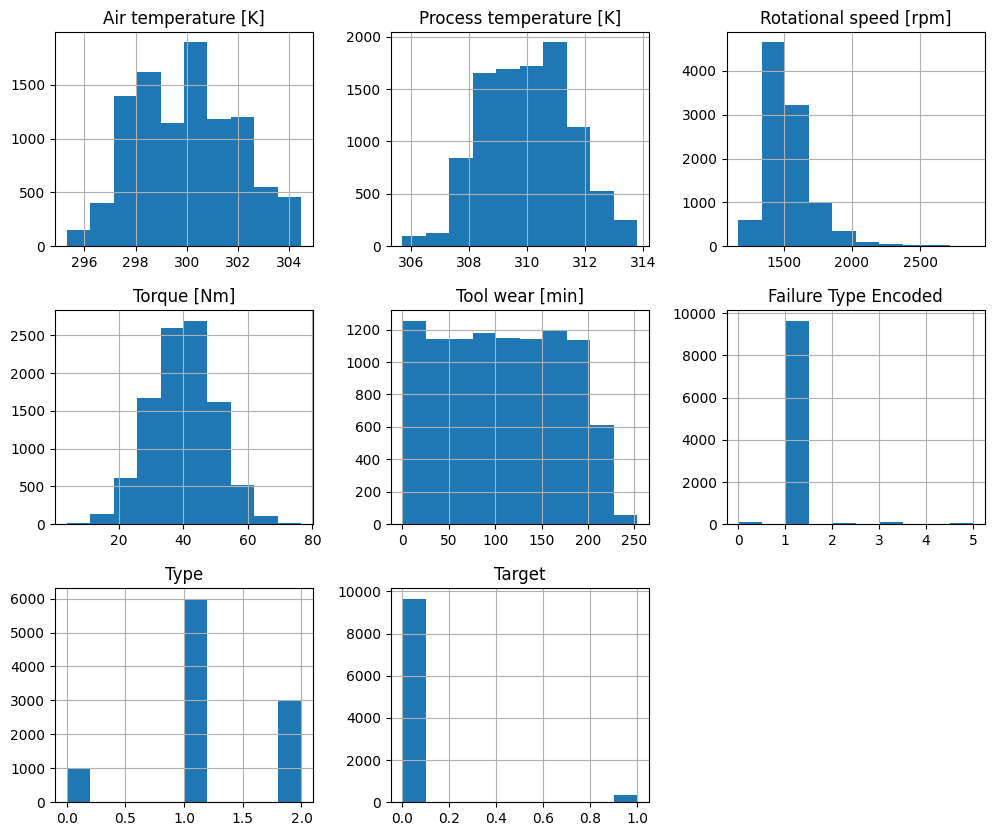

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
data[numerical_columns].hist(figsize=(12, 10))
plt.show()


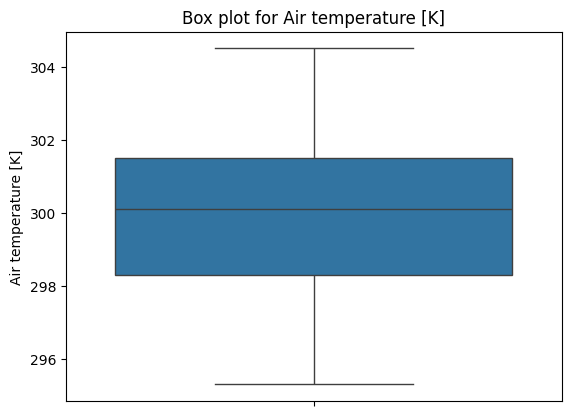

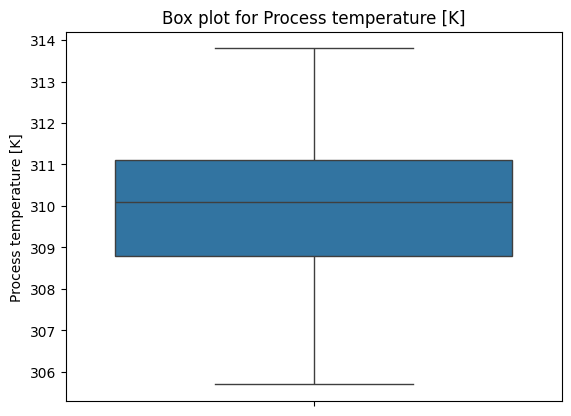

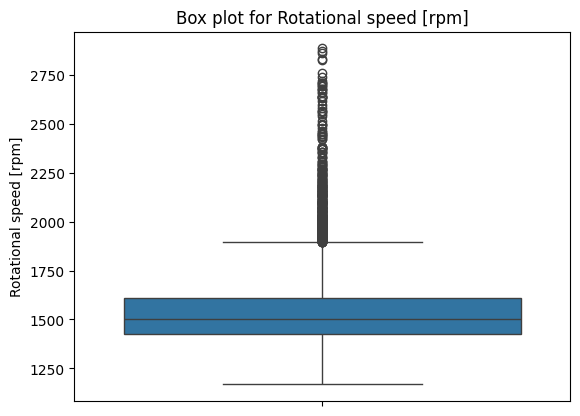

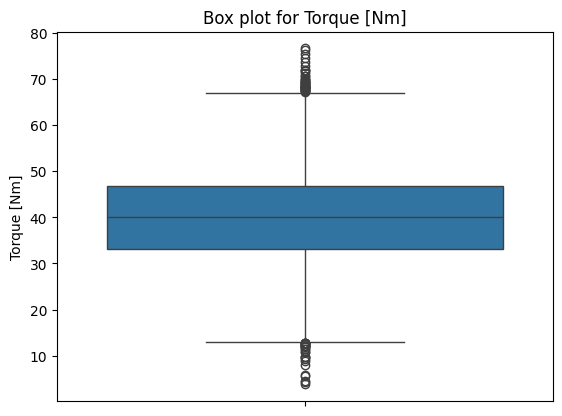

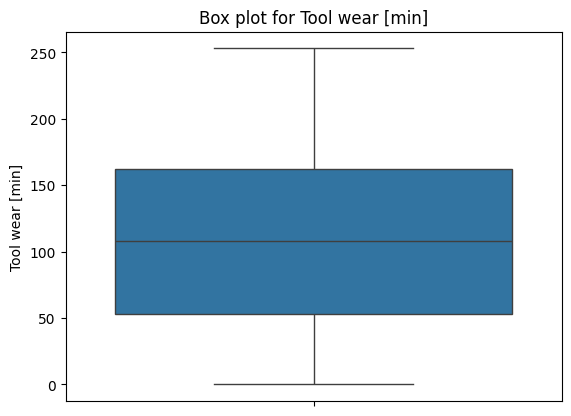

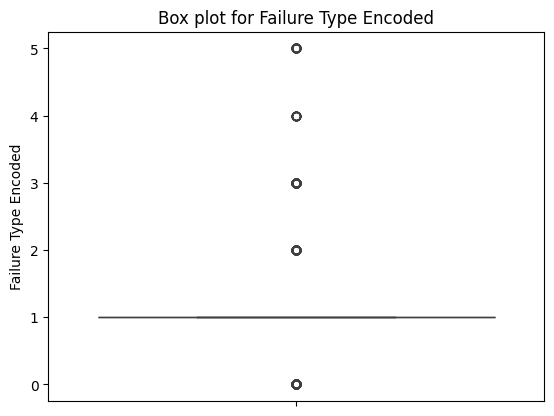

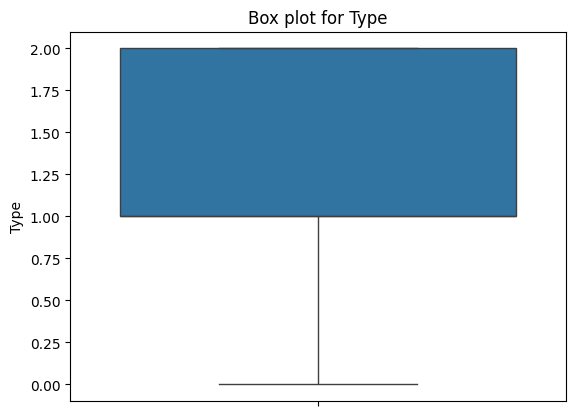

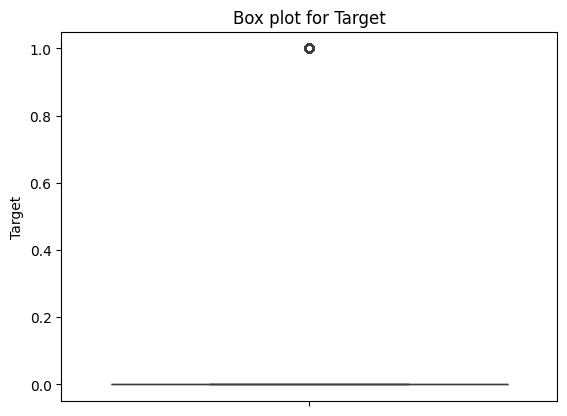

In [70]:
# Box plots for checking outliers
for col in numerical_columns:
    sns.boxplot(data[col])
    plt.title(f'Box plot for {col}')
    plt.show()

**DROPPING COLUMNS IRRELEVANT TO PREDICTION OF FAILURE**

In [71]:
data = data.drop(['UDI', 'Product ID', 'Failure Type Encoded'], axis=1)  # Exclude UID and Product ID

**TRAINING AND TESTING OF MODEL**

In [72]:
from sklearn.model_selection import train_test_split

# Assuming you want to predict both 'Target' and 'Failure Type Encoded'
X = data.drop(['Target'], axis=1)  # Drop target columns from features
y = data[['Target']]  # Use both columns as target variables

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**LOGISTIC REGRESSION**

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.68      0.27      0.38        93

    accuracy                           0.97      3000
   macro avg       0.83      0.63      0.69      3000
weighted avg       0.97      0.97      0.97      3000



C:\Users\manmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**RANDOM FOREST CLASSIFIER**

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


C:\Users\manmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9873333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.90      0.67      0.77        93

    accuracy                           0.99      3000
   macro avg       0.94      0.83      0.88      3000
weighted avg       0.99      0.99      0.99      3000



**GRADIENT BOOSTING CLASSIFIER**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


C:\Users\manmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.986
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.87      0.65      0.74        93

    accuracy                           0.99      3000
   macro avg       0.93      0.82      0.87      3000
weighted avg       0.99      0.99      0.98      3000



**COMPARING ALL MODELS APPLIED AND GIVING BEST SUITED MODEL TO PREDICT FAILURE AND MAINTENANCE**

In [77]:
# Compare the accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

best_model = max(accuracy_scores, key=accuracy_scores.get)
print("Best Model:", best_model)


Best Model: Random Forest
